In [58]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import find_peaks, peak_prominences, peak_widths

In [6]:
data = pd.read_csv('monte_carlo_outputTest.txt', sep="\t")
data.columns =['Time', 'V(compout)', 'V(input)', 'V(out)', 'V(ref)', 'I(comp)']
data.head()
# data.plot()
# plt.show()

,Time,V(compout),V(input),V(out),V(ref),I(comp)
0,0.000000e+00,0.141707,0.000290,-9.488106e-07,-0.01,-0.000003
1,4.290000e-10,0.141707,0.000290,-9.488106e-07,-0.01,-0.000003
2,4.290500e-10,0.141707,-0.000168,-9.488106e-07,-0.01,-0.000003
3,4.291500e-10,0.141707,-0.002109,-9.488106e-07,-0.01,-0.000003
4,4.293500e-10,0.141707,-0.009286,-9.488106e-07,-0.01,-0.000003


In [7]:
data.to_numpy()

array([[ 0.00000000e+00,  1.41706700e-01,  2.90274400e-04,
        -9.48810600e-07, -1.00000000e-02, -3.47419000e-06],
       [ 4.29000000e-10,  1.41706700e-01,  2.90274400e-04,
        -9.48810600e-07, -1.00000000e-02, -3.47419000e-06],
       [ 4.29050000e-10,  1.41706700e-01, -1.67800900e-04,
        -9.48810600e-07, -1.00000000e-02, -3.43463200e-06],
       ...,
       [ 9.56339915e-06,  1.41706700e-01,  2.90280900e-04,
         2.03810700e-05, -1.00000000e-02, -3.47419100e-06],
       [ 1.04993991e-05,  1.41706700e-01,  2.90278700e-04,
         5.11001900e-06, -1.00000000e-02, -3.47419100e-06],
       [ 1.05000000e-05,  1.41706700e-01,  2.90278700e-04,
         5.10224800e-06, -1.00000000e-02, -3.47419100e-06]])

In [8]:
data.describe()

,Time,V(compout),V(input),V(out),V(ref),I(comp)
count,8.150000e+02,815.000000,815.000000,8.150000e+02,8.150000e+02,8.150000e+02
mean,5.527524e-07,0.142784,-0.055173,1.324799e-04,-1.000000e-02,-1.178906e-06
std,1.721898e-06,0.006476,0.045567,3.595595e-04,1.735789e-18,1.537556e-06
min,0.000000e+00,0.141707,-0.169837,-1.262195e-06,-1.000000e-02,-3.759232e-06
25%,5.079500e-10,0.141707,-0.093911,-9.488106e-07,-1.000000e-02,-3.474191e-06
50%,2.709191e-09,0.141707,-0.060309,-9.488029e-07,-1.000000e-02,-8.791611e-08
75%,8.165045e-09,0.143308,0.000290,-9.487056e-07,-1.000000e-02,-6.460267e-09
max,1.050000e-05,0.245066,0.003861,1.541330e-03,-1.000000e-02,-1.137342e-10


In [14]:
plt.close("all")
df = pd.DataFrame(data)
df.dtypes

Time          float64
V(compout)    float64
V(input)      float64
V(out)        float64
V(ref)        float64
I(comp)       float64
dtype: object

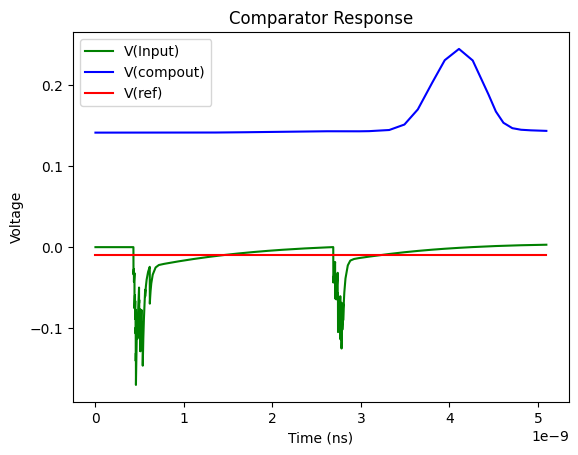

In [56]:
newdf = df.truncate(after=605)
fig, ax = plt.subplots()

x = newdf["Time"]
y1 = newdf["V(input)"]
y2 = newdf["V(compout)"]
y3 = newdf["V(ref)"]


ax.plot(x,y1, 'g-', label='V(Input)')
ax.plot(x,y2, 'b-', label='V(compout)')
ax.plot(x,y3, 'r-', label='V(ref)')
plt.title('Comparator Response')
plt.ylabel("Voltage")
plt.xlabel("Time (ns)")
plt.legend()


In [60]:
def LabelPeaks_ShrinkData( xvalues, yvalues, lowerxlim, upperxlim, lowerylim): 
    ''' Takes: Original bulk data (x,y) and limits to truncate the data
        Returns: The desired peaks and the truncated data (xnew,ynew)'''
    #Find bin x-values to associated local y-Max values
    peaks, _ = find_peaks(yvalues, distance=5)

    # width_full = peak_widths(xvalues, peaks, rel_height=1)
    # width_half = peak_widths(xvalues, peaks, rel_height=0.5)
    #Label the associated y-Max values
    all_ymax = yvalues[peaks]

    #forloop/zip: This applies the truncation on the Peak values ONlY
    #For p value our zip set (bin,intensity)
    #if: select the range of peaks we want
    #and: select the limit of intensity values
    tru_peaks = [p for (p,y) in zip(peaks,all_ymax) if ((p >= lowerxlim and p<= upperxlim) and y >= lowerylim)]

    # Truncate the data to make the peak values 
    new_yvalues =[]
    new_xvalues =[]
    for n in xvalues: 
        if n >= lowerxlim and n <= upperxlim:
            new_xvalues.append(n)
            new_yvalues.append(yvalues[n])
        else: 
            continue
    return tru_peaks, new_xvalues, new_yvalues


def Plots(x, y, title, xlabel, ylabel, xrange = [ -1 , -1 ] , yrange = [ -1 , -1 ], figsize0 = 'a', figsize1 = 'a'):
    '''Plots anything but plots Intensities really well'''
    
    plt.style.use(astropy_mpl_style)
    hfont = {'fontname':'Consolas'}

    #style plot
    if figsize0 != 'a' and figsize1 != 'a': 
        print(f'Ratio set : ({figsize0}, {figsize1})')
        fig, axes = plt.subplots(figsize= (figsize0,figsize1))
        
    elif figsize0 == 'a' and figsize1 == 'a': 
        print('Data ratio set')
        fig, axes = plt.subplots()
        if yrange == [ -1 , -1 ] :
            yspan = max(y) - min(y)
            yrange =[ min(y) - yspan/10. , max(y) + yspan/10. ]
            plt.ylim( yrange )
        if xrange == [ -1 , -1 ] :
            xspan = max(x) - min(x)
            xrange = [ min(x) - xspan/10. , max(x) + xspan/10. ]
            plt.xlim( xrange )

    #plot
    axes.plot(x, y, label= 'File Data', color='blue')

    #labels
    axes.set_title(title, **hfont)
    axes.set_ylabel(ylabel, **hfont)
    axes.set_xlabel(xlabel, **hfont)
    return 

In [87]:
peaks, _ = find_peaks(y2.to_numpy(), distance=5)
VComp = y2.to_numpy()
Vpeak = VComp[peaks]
print(Vpeak)

[0.1433945 0.245066 ]
